In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
summer = pd.read_csv('summer.csv')

In [4]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
summer['Athlete'] = summer['Athlete'].str.split(', ').str[::-1].str.join(' ')
summer['Athlete'] = summer['Athlete'].str.title()

In [6]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver


In [7]:
menData = summer[summer['Gender'] == 'Men']
womenData = summer[summer['Gender'] == 'Women']

In [8]:
print("Male Athlete with highest number of medals : ")
pd.value_counts(menData['Athlete']).head(1)

Male Athlete with highest number of medals : 


Michael Phelps    22
Name: Athlete, dtype: int64

In [9]:
print("Female Athlete with highest number of medals : ")
pd.value_counts(womenData['Athlete']).head(1)

Female Athlete with highest number of medals : 


Larisa Latynina    18
Name: Athlete, dtype: int64

In [10]:
print("Male Athlete with max gold, silver and bronze")
medals = summer.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals.drop_duplicates('Medal').reset_index().drop(columns='index')

Male Athlete with max gold, silver and bronze


,Athlete,Medal,Sport
0,Michael Phelps,Gold,18
1,Franziska Van Almsick,Bronze,6
2,Shirley Farber Babashoff,Silver,6


In [11]:
print("Total Medal Won by top 10 countries")

summer.groupby('Country')['Medal'].count().sort_values(ascending=False)[:10]

Total Medal Won by top 10 countries


Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
Name: Medal, dtype: int64

In [14]:
print("Medal Distribution of top 10 countries")

medal_country = summer.groupby(['Country','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medal_country.head()

Medal Distribution of top 10 countries


,Country,Medal,Sport
327,USA,Gold,2235
328,USA,Silver,1252
326,USA,Bronze,1098
321,URS,Gold,838
322,URS,Silver,627


In [15]:
medal_country = medal_country.pivot('Country','Medal','Sport').fillna(0)
medal_country.head()

Medal,Bronze,Gold,Silver
Country,,,
AFG,2.0,0.0,0.0
AHO,0.0,0.0,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0


In [16]:
top_country = medal_country.sort_values(by='Gold',ascending=False)[:11]
top_country.head(10)

Medal,Bronze,Gold,Silver
Country,,,
USA,1098.0,2235.0,1252.0
URS,584.0,838.0,627.0
GBR,553.0,546.0,621.0
ITA,404.0,476.0,416.0
GER,475.0,452.0,378.0
HUN,351.0,412.0,316.0
FRA,497.0,408.0,491.0
SWE,328.0,349.0,367.0
GDR,225.0,329.0,271.0


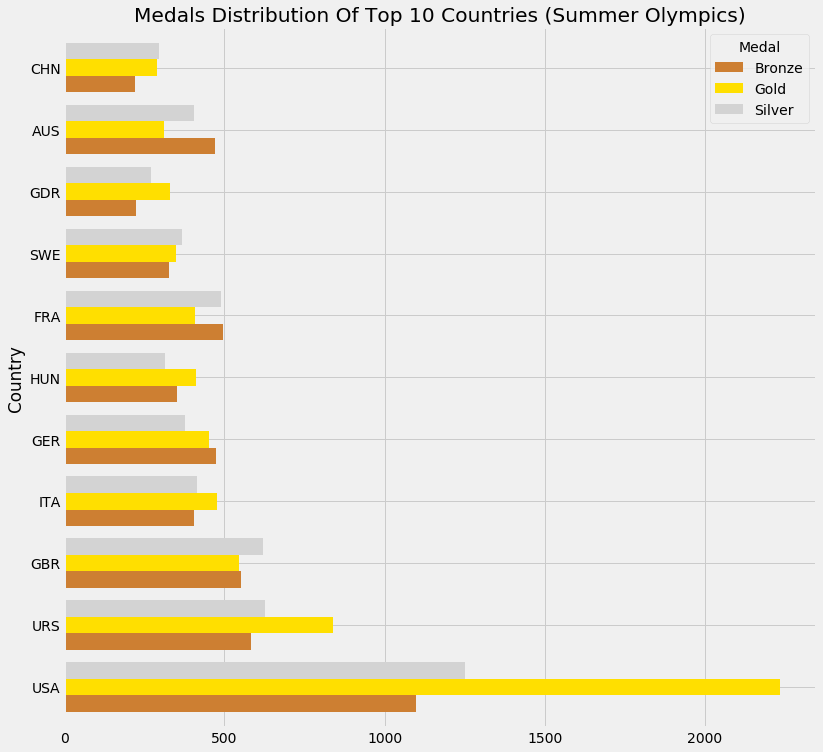

In [89]:
top_country.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

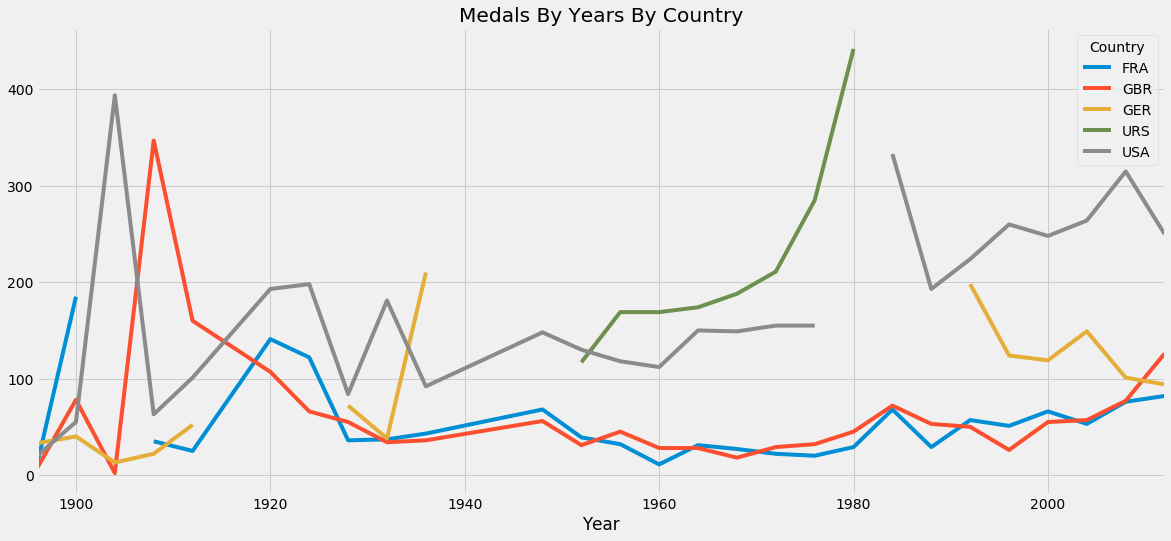

In [71]:
test1=summer.groupby(['Country','Year'])['Medal'].count().reset_index()
test1=test1[test1['Country'].isin(summer['Country'].value_counts()[:5].index)]
test1=test1.pivot('Year','Country','Medal')
test1.plot()
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.title('Medals By Years By Country')
plt.show()

In [17]:
usa_df = summer[summer["Country"] == "IND"]
gd = pd.DataFrame({"tally" : usa_df.groupby(["Year", "Medal"]).size()}).reset_index()

In [19]:
gd.head(10)

,Year,Medal,tally
0,1900,Silver,2
1,1928,Gold,15
2,1932,Gold,11
3,1936,Gold,19
4,1948,Gold,20
5,1952,Bronze,1
6,1952,Gold,14
7,1956,Gold,17
8,1960,Silver,13
9,1964,Gold,15


In [20]:
pivoted = gd.pivot(index="Year", columns="Medal", values="tally").fillna(0)

In [22]:
pivoted.head(10)

Medal,Bronze,Gold,Silver
Year,,,
1900,0.0,0.0,2.0
1928,0.0,15.0,0.0
1932,0.0,11.0,0.0
1936,0.0,19.0,0.0
1948,0.0,20.0,0.0
1952,1.0,14.0,0.0
1956,0.0,17.0,0.0
1960,0.0,0.0,13.0
1964,0.0,15.0,0.0


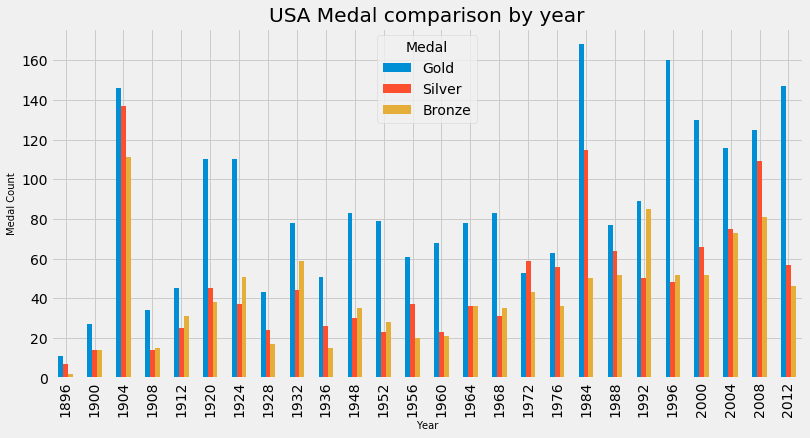

In [98]:
ax = pivoted[["Gold", "Silver", "Bronze"]].plot(kind="bar", title="USA Medal comparison by year", figsize=(12, 6))
ax.set_xlabel("Year", fontsize=10)
ax.set_ylabel("Medal Count", fontsize=10)
plt.show()